In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
# import tensorflow as tf
# from tensorflow import keras

## Simple Linear Regression
We will start with the most familiar linear regression, a straight-line fit to data. A straight-line fit is a model of the form
y=ax+b
where a
 is commonly known as the slope, and b
 is commonly known as the intercept.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of 2:

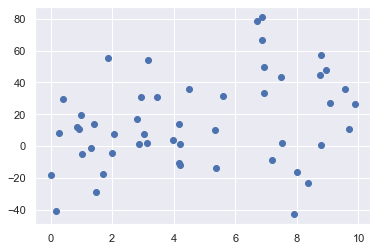

In [32]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x +2 + 30*rng.randn(50)
plt.scatter(x, y);

Model slope:     2.8162643108208663
Model intercept: 2.042687433403822


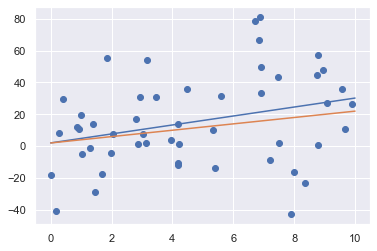

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);
#plot true value
ytrue=2*xfit+2
plt.plot(xfit, ytrue)
plt.savefig('linreg.png', dpi = 300)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

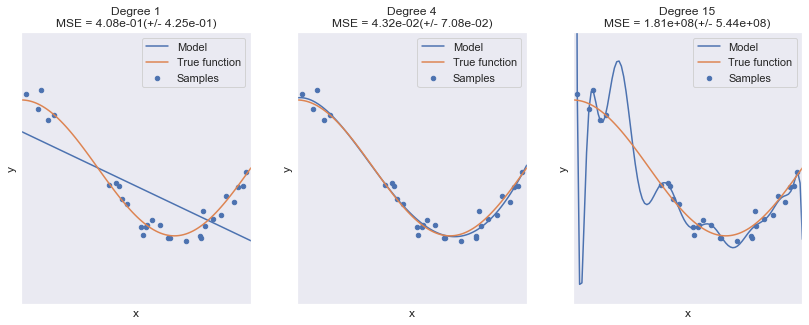

In [34]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30

#number of polynomials we want to  fit
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.savefig('poly.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<bound method NDFrame.head of       ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...    ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI CLASS  
0  

<AxesSubplot:xlabel='BMI', ylabel='Chol'>

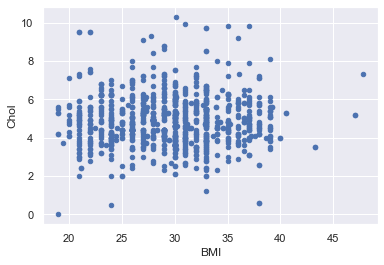

In [36]:
#now lets load in a real dataset 

df = pd.read_csv("Dataset of Diabetes .csv")
print(df.head)

df.plot.scatter(x='BMI', y='Chol')

In [37]:
xChol = np.array(df['BMI']).reshape(-1,1)
yChol = np.array(df['Chol']).reshape(-1,1)

#split the data up 
X_train, X_test, y_train, y_test = train_test_split(xChol, yChol, test_size = 0.25)
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

-0.0022640597479453017


Coefficients: 
 [[0.00067409]]
Coefficients: 
 [4.85910808]


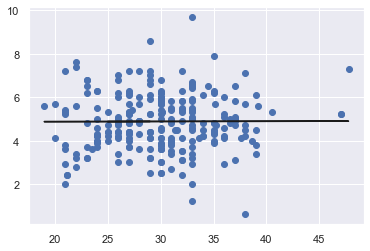

In [38]:
# Wow really bad, lets look! 

y_pred = regr.predict(X_test)
print("Coefficients: \n", regr.coef_)
print("Coefficients: \n", regr.intercept_)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
 
plt.show()

<bound method NDFrame.head of       0.00e+00   0.00e+00.1   0.00e+00.2   0.00e+00.3   0.00e+00.4  \
0        0.182        0.223        0.560       -0.805       0.0139   
1        0.273        0.259        0.804       -1.160      -0.1440   
2        0.392        0.297        0.998       -1.420      -0.3720   
3        0.560        0.349        1.170       -1.670      -0.6180   
4        0.776        0.423        1.340       -1.850      -0.8460   
..         ...          ...          ...          ...          ...   
992      9.010        9.010        9.010       -0.245      -9.0100   
993      9.010        9.010        9.010       -0.245      -9.0100   
994      9.010        9.010        9.010       -0.245      -9.0100   
995      9.010        9.010        9.010       -0.245      -9.0100   
996      9.010        9.010        9.010       -0.245      -9.0100   

      0.00e+00.5   0.00e+00.6   0.00e+00.7   0.00e+00.8   0.00e+00.9  \
0            0.0          0.0          0.0        0.206  

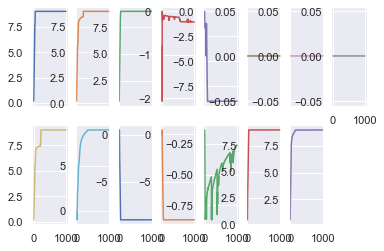

<Figure size 432x288 with 0 Axes>

In [39]:
# lets plot some of the predicted coefficients: 


a = pd.read_csv("./sbinn/sbinn/variables.csv")
a=a.drop(a.columns[0], axis=1)
print(a.head)

a.plot(subplots=True, layout=(2,8), legend=False)
#plt.tight_layout()
plt.show()
plt.savefig('parameters.png', dpi=300)


In [9]:
from tensorflow import keras
from tensorflow.keras import layers


# Generate random training, testing, and validation data
# Training data is used to fit the model, the validation data is used to tune 
# the hyperparameters of the model, and the test data is used to evaluate the 
# performance of the model on new data
X_train = np.random.uniform(-np.pi, np.pi, 1000)
y_train = np.sin(X_train)

X_test = np.random.uniform(-np.pi, np.pi, 100)
y_test = np.sin(X_test)

X_val = np.random.uniform(-np.pi, np.pi, 100)
y_val = np.sin(X_val)


# Define the layer structure of the neural network
# Input layer which is actually the input of the 1-dim. real Sinus function
input_layer = layers.Input(shape=(1,))
# Hidden layer where the heavy lifting of the approximation of the Sinus function is performed.
# Note that hidden_layer uses the input_layer as input
hidden_layer = layers.Dense(800, activation='sigmoid')(input_layer)
# Output layer which is the result of the 1-dim. real Sinus function.
# Note that output_layer uses the hidden_layer as input
output_layer = layers.Dense(1, activation='linear')(hidden_layer)

# Create the neural network model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Check model structure
model.summary()
model.layers

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit model to training data with validation
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, verbose=1)

# Evaluate model on test data
loss = model.evaluate(X_test, y_test)

# Generate test data of actual
# and predicted values for plotting
X_test.sort() #sort list since we picked them randomly
y_plot = np.sin(X_test)
y_pred = model.predict(X_test)

# Plot the development of the loss function during training
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


# Plot predicted values and test data
plt.plot(X_test, y_pred, label='Approximation')
plt.plot(X_test, y_plot, label='Actual')
plt.legend()
plt.show()

ImportError: cannot import name 'builder' from 'google.protobuf.internal' (C:\Research\Projects\simWerx\code\builds\pulse-engine\Innerbuild\src\python\google\protobuf\internal\__init__.py)